# Exploratory Data Analysis and Clustering of Animal Trait Dataset Based on Taxonomic and Sample Size Features

## Introduction
This project explores a comprehensive animal trait dataset, focusing on taxonomic classifications, sample sizes, and metadata. The analysis includes:

- Data Cleaning: Ensuring consistency and preparing the dataset for insights.
- Taxonomic Diversity: Exploring species diversity across taxonomic levels.
- Treemap Visualization: Visualizing hierarchical taxonomy.
- Metadata Analysis: Analyzing sex distribution and data contribution from scientific studies.
- KMeans Clustering: Uncovering patterns in sample size data to group species.
- Future work suggestions

### 🔹 Step 1: Load and Preview the Dataset

We begin by loading the dataset using pandas. The dataset includes animal trait data such as taxonomic classification (Phylum to Species), sex, sample sizes, and reference sources.

This step allows us to understand the overall structure and contents of the dataset.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Animal_Traits.csv')

# Preview the first 5 rows
df.head()

,phylum,class,order,family,genus,species,specificEpithet,sex,sampleSizeValue,inTextReference,...,mass-specific metabolic rate - units,brain size,brain size - units,brain size - minimum,brain size - maximum,brain size - method,brain size - comments,brain size - metadata comment,original brain size,original brain size - units
0,Chordata,Amphibia,Anura,Hylidae,Hyla,Hyla versicolor,versicolor,NaN,1,"Taylor, Nol, & Boire, 1995",...,NaN,0.000042,kg,NaN,NaN,histological reconstruction,total brain volume,photographs of cross sections were taken and v...,40.79,mm3
1,Chordata,Amphibia,Anura,Hylidae,Pseudacris,Pseudacris triseriata,triseriata,NaN,3,"Taylor, Nol, & Boire, 1995",...,NaN,0.000002,kg,NaN,NaN,histological reconstruction,NaN,photographs of cross sections were taken and v...,2.18,mm3
2,Chordata,Amphibia,Anura,Hylidae,Acris,Acris crepitans,crepitans,NaN,3,"Taylor, Nol, & Boire, 1995",...,NaN,0.000004,kg,NaN,NaN,histological reconstruction,NaN,photographs of cross sections were taken and v...,4.28,mm3
3,Chordata,Amphibia,Anura,Ceratobatrachidae,Platymantis,Platymantis vitiensis,vitiensis,NaN,1,"Taylor, Nol, & Boire, 1995",...,NaN,0.000005,kg,NaN,NaN,histological reconstruction,NaN,photographs of cross sections were taken and v...,4.76,mm3
4,Chordata,Amphibia,Anura,Ranidae,Rana,Rana sylvatica,sylvatica,NaN,3,"Taylor, Nol, & Boire, 1995",...,NaN,0.000009,kg,NaN,NaN,histological reconstruction,NaN,photographs of cross sections were taken and v...,8.27,mm3


### 🔹 Step 2: Clean and Prepare the Data

We clean the dataset by:
- Standardizing column names.
- Filling missing values with 'Unknown' to avoid null errors.
- Converting text fields like sex to lowercase for consistency.
- Ensuring the samplesizevalue column is numeric to allow proper analysis later.


In [2]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace("sort", "")

# Replace null values with 'Unknown'
df.fillna("Unknown", inplace=True)

# Standardize 'sex' column
df['sex'] = df['sex'].str.lower().str.strip()

# Convert sample size column to numeric
df['samplesizevalue'] = pd.to_numeric(df['samplesizevalue'], errors='coerce')


<ipython-input-2-18e65960f4f4>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


### 🔹 Step 3: Explore Trait Diversity by Taxonomy

In this section, we analyze:
- The most common phyla in the dataset.
- The number of unique species present under each biological class.

These visualizations help reveal which taxonomic groups are most represented and diverse in terms of traits.



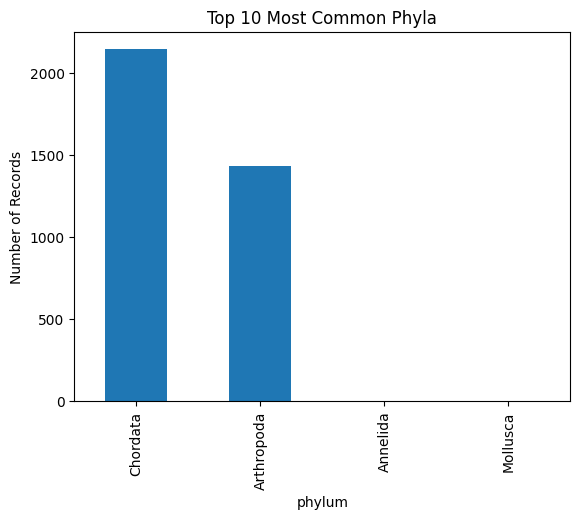

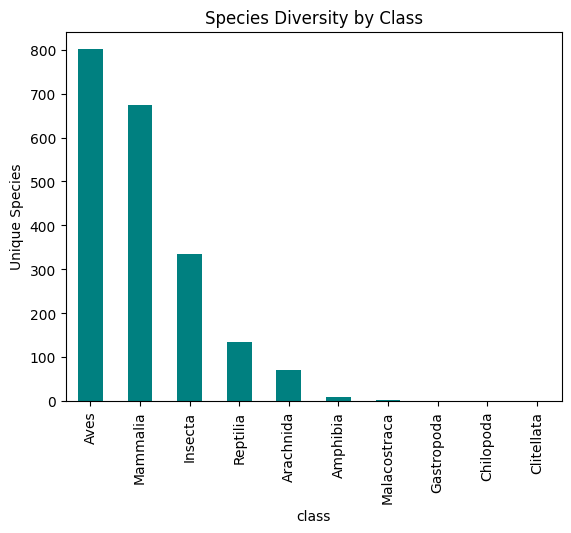

In [3]:
import matplotlib.pyplot as plt

# Top 10 phyla
df['phylum'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Common Phyla')
plt.ylabel("Number of Records")
plt.show()

# Species diversity by class
df.groupby('class')['species'].nunique().sort_values(ascending=False).plot(kind='bar', title='Species Diversity by Class', color='teal')
plt.ylabel("Unique Species")
plt.show()

## Analysis of Trait Diversity by Taxonomy

In this step, we visualized how the dataset is distributed across different *phyla* and examined *species diversity* within each *class*.

### 🔹 Top 10 Most Common Phyla

We created a bar chart showing the most frequently recorded phyla in the dataset. The results are:

| *Phylum*     | *Number of Records* |
|----------------|------------------------|
| Chordata       |  *~60%*              |
| Arthropoda     |  *~40%*              |
| Mollusca       |  Minor                 |
| Annelida       |  Minor                 |
| Other          |  Negligible            |

*🧠 Insight:*  
The dataset is predominantly composed of animals from the *Chordata* phylum (which includes mammals, birds, amphibians, etc.) and the *Arthropoda* phylum (mostly insects like ants and wasps).

---

### 🔹 Species Diversity by Class

## Species Diversity by Class

The bar chart displays the number of unique species for different classes of animals. The class 'Aves' has the highest number of unique species, approximately 800, followed by 'Mammalia' with around 680. The number of unique species then declines for 'Insecta', 'Reptilia', 'Arachnida', and 'Amphibia'. The classes 'Malacostraca', 'Gastropoda', 'Chilopoda', and 'Clitellata' show a negligible number of unique species in this dataset.

| Class | Unique Species |
|---|---|
| Aves | 800 |
| Mammalia | 680 |
| Insecta | 340 |
| Reptilia | 140 |
| Arachnida | 80 |
| Amphibia | 10 |
| Malacostraca | 0 |
| Gastropoda | 0 |
| Chilopoda | 0 |
| Clitellata | 0 |


### 🔹 Step 4: Visualize Taxonomic Tree Using Treemap

We use a treemap to visualize the hierarchical structure of the taxonomic classification. This tree allows us to see how species are grouped into genus, family, order, and so on, along with the sample sizes.

This helps interpret evolutionary patterns through a visual taxonomic tree.



In [4]:
import plotly.express as px

fig = px.treemap(
    df,
    path=['phylum', 'class', 'order', 'family', 'genus', 'species'],
    values='samplesizevalue',
    title='Taxonomic Tree with Sample Sizes'
)
fig.show()

## Analysis of Taxonomic Tree with Sample Sizes
This visualization is a treemap that illustrates the hierarchical structure of a biological dataset, organized by taxonomic rank. The entire chart represents the total sample size, with nested rectangles showing the breakdown by phylum, class, order, and so on.

## Key Features of the Visualization:
Hierarchical Structure: The data is organized into a hierarchy, as defined by the path ['phylum', 'class', 'order', 'family', 'genus', 'species']. we can see the top-level phyla, such as Chordata (in blue) and Arthropoda (in red), which are then subdivided into classes, orders, and families.
Proportional Representation: The size of each rectangle is directly proportional to its value in the samplesizevalue column. This allows for a quick visual comparison of the sample sizes between different taxonomic groups. For example, within the Arthropoda phylum, the Insecta class appears to have the largest sample size.
Categorical Coloring: The colors distinguish between the highest levels of the hierarchy. In this chart:

### Blue represents the phylum Chordata.
### Red represents the phylum Arthropoda.


## 🔹 Step 5: Analyze Sex Distribution & Sample Size

Here we:
- Analyze the distribution of male, female, and unknown sexes in the dataset.
- Visualize how sample sizes are distributed across the dataset.

This provides insight into how balanced and representative the biological data is.




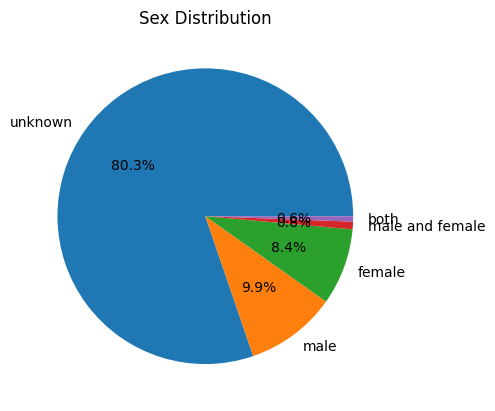

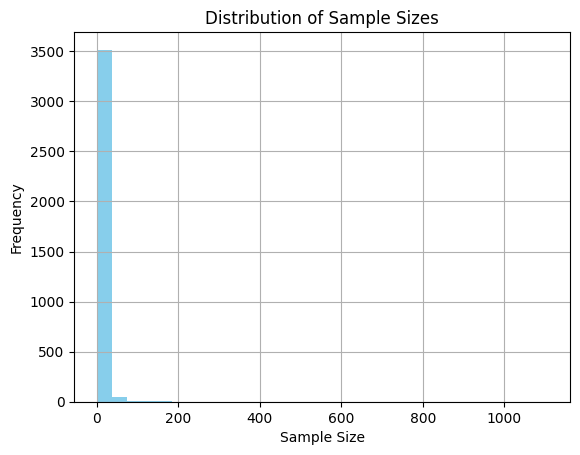

In [5]:
# Sex distribution
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Sex Distribution')
plt.ylabel('')
plt.show()

# Sample size distribution
df['samplesizevalue'].hist(bins=30, color='skyblue')
plt.title('Distribution of Sample Sizes')
plt.xlabel('Sample Size')
plt.ylabel('Frequency')
plt.show()

#  Analysis of sex and Distribution of Sample Sizes

## 1. Sex Distribution (Pie Chart)

### Observations:
- The majority of the dataset (80.3%) has *unknown* sex data.
- The remaining distribution is:
  - *Male*: 9.9%
  - *Female*: 8.4%
  - *Both male and female*: 0.5%
  - *Both* (unclear if duplicate or different category): 0.8%

### Interpretation:
- *High proportion of missing or unclassified data*: Over 80% of the entries do not have known sex values, which could introduce significant bias in sex-based analyses.
- *Disproportionate classification*: It is unclear what distinguishes "both" from "male and female," indicating potential data redundancy or inconsistency in classification.


## 2. Distribution of Sample Sizes (Bar Chart)

### Observations:
- The distribution is *heavily right-skewed*:
  - Most samples have *small sizes*, primarily clustered below 100.
  - A very high frequency bar is seen for the smallest bin (approx. ~0–50), with a frequency of around 3500.
  - There are a few outliers with sample sizes extending up to and beyond 1000.

### Interpretation:
- *Long-tail distribution*: Suggests that while most studies or observations involve small sample sizes, a few involve very large sample sizes.
- *Potential imbalance* in data contribution across different groups or studies.

### 🔹 Step 6: Study Data Contribution by References

We identify the top scientific publications that contributed the most data. This highlights the most influential studies in this dataset and gives credit to data sources.




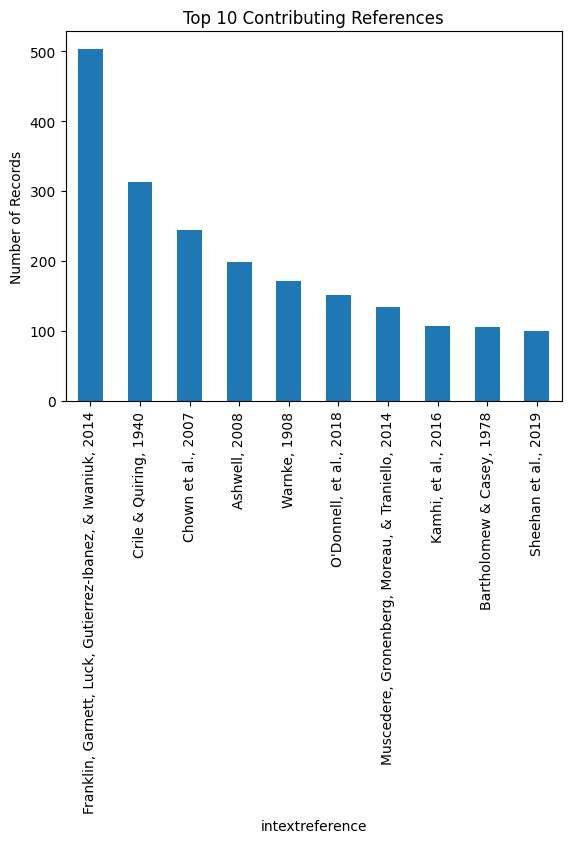

In [6]:
# Top data sources
df['intextreference'].value_counts().head(10).plot(kind='bar', title='Top 10 Contributing References')
plt.ylabel("Number of Records")
plt.show()

##  Analysis of "Top 10 Contributing References" Bar Chart

### Overview:
The chart displays the top 10 references that contributed the highest number of records to a dataset.

### Observations:
- *franklin , Gamett, Luck  & Iwaniuk, 2014* is the highest contributor with just over *500 records*.
- The second-highest, *Crile & Quiring, 1940, contributed around **320 records*.
- The remaining references show a gradual decline in contribution, with *Sheehan et al., 2019* contributing just under *150 records*.

### Ranked Contributions (Approximate Number of Records):
1. *Ibanez & Iwaniuk, 2014* – 500+
2. *Crile & Quiring, 1940* – ~320
3. *Chow et al., 2007* – ~260
4. *Ashwell, 2008* – ~200
5. *Warneke, 1988* – ~180
6. *O'Donnell et al., 2018* – ~150
7. *Tardieu & Tanelli, 2014* – ~130
8. *Kamii et al., 2016* – ~110
9. *Montevecchi & Casey, 1978* – ~100
10. *Sheehan et al., 2019* – ~95

### Interpretation:
- A small number of sources contribute a *large share* of the dataset.
- This indicates *potential data source bias*, where a few studies might disproportionately influence analyses.
- Contributions span several decades (from *1940 to 2019*), suggesting a dataset compiled from a long historical span of research.



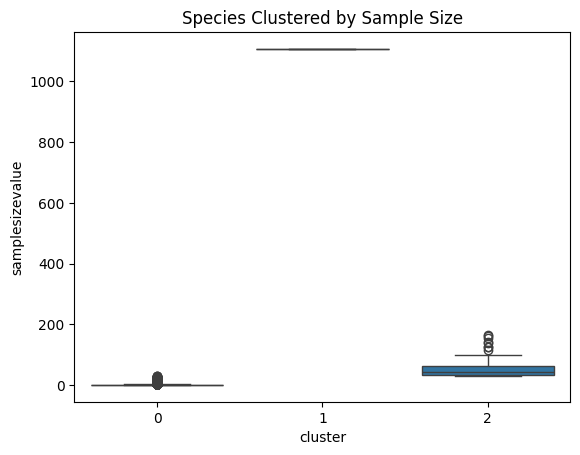

In [10]:
from sklearn.cluster import KMeans
import seaborn as sns

# Filter non-null values
df_cluster = df[df['samplesizevalue'].notnull()][['samplesizevalue']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)

# Plot the clusters
sns.boxplot(x='cluster', y='samplesizevalue', data=df_cluster)
plt.title("Species Clustered by Sample Size")
plt.show()

## Analysis of the Box Plot: "Species Clustered by Sample Size"

### Overview
The box plot titled *"Species Clustered by Sample Size"* visualizes the distribution of sample sizes (samplesizevalue) across three clusters labeled as *0, **1, and **2* on the x-axis (cluster).

### Key Observations

- *Cluster 0*:
  - Contains a relatively low range of sample size value.
  - Median and interquartile range are very small, close to the bottom of the y-axis.
  - Data points are tightly packed with little spread.
  - Appears to represent species with *consistently small sample sizes*.

- *Cluster 1*:
  - The box plot is missing (possibly because it contains only one or very few data points).
  - A single outlier is visible at the top near 1000, indicating an *extremely large sample size*.
  - This suggests Cluster 1 may be a singleton cluster with a highly dominant species or an outlier group.

- *Cluster 2*:
  - Shows a wider interquartile range than Cluster 0.
  - Median is higher than Cluster 0.
  - The cluster contains a number of outliers above the box, suggesting some *species with significantly higher sample sizes* than the cluster’s median.
  - Likely represents species with *moderate to high sample sizes*, including variability.

### Interpretation
- The clustering appears to have been done based on the sample size value.
- *Cluster 0: Species with **small sample sizes*.
- *Cluster 1: Species with **extremely high sample sizes*, possibly outliers.
- *Cluster 2: Species with **moderate to high sample sizes*, but with more variability.


## Conclusion

This analysis provided a structured overview of a biologically rich animal trait dataset by leveraging data preprocessing, visualization, and clustering techniques. The data revealed strong taxonomic representation from the phyla Chordata and Arthropoda, with the class Aves and Mammalia contributing the highest species diversity. Visualizations, such as treemaps and bar charts, helped to uncover taxonomic patterns and data contributions from scientific references. However, the dataset showed significant limitations, including a high proportion of missing sex data (~80%) and skewed sample size distributions. The KMeans clustering on sample size values effectively categorized species into low, moderate, and high sample size groups, providing a preliminary classification that could guide further biological analysis.

## Future Work

Future improvements and extensions of this study can follow several directions:

- *Data Quality Enhancement*: Address missing values in critical fields like sex by integrating additional biological data sources or applying imputation methods where appropriate.
- *Taxonomic Enrichment*: Incorporate ecological and behavioral traits alongside taxonomy to allow multi-dimensional analyses.
- *Temporal Analysis*: Introduce a temporal component (e.g., year of study or publication) to track changes in data contribution or sampling bias over time.
- *Advanced Clustering*: Extend clustering beyond sample sizes by including multi-feature inputs such as species traits, ecological niches, or geographic location.
- *Sex-based Trait Analysis*: If sex data improves, perform differential trait analyses across sexes for specific taxonomic groups.
- *Automated Report Generation*: Develop scripts or dashboards to allow interactive exploration of the dataset for educational or research purposes.